In [3]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [2]:
!pip install keras

In [6]:
Train_data_dir=r'images/train'
validation_data_dir=r'images/test'

In [7]:
file = os.listdir(r'images/train')
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

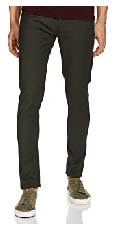

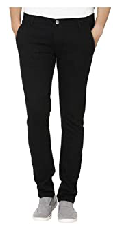

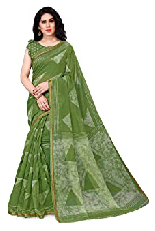

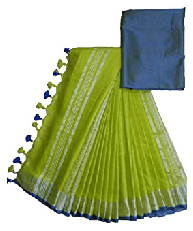

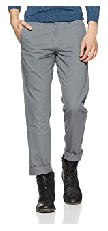

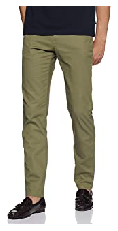

In [8]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
Jeans_train=r'images/train/Jeans (men)'
Saree_train=r'images/train/Sarees (women)'
Trouser_train=r'images/train/Trousers (men)'


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [9]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=179
nb_validation_samples=20
batch_size=8
epoch=150

In [10]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 537 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [11]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 574, 574, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 574, 574, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 287, 287, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 287, 287, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 285, 285, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 285, 285, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 142, 142, 32)      0

In [12]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [13]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/150
22/22 [==============================] - 261s 9s/step - loss: 4.0809 - accuracy: 0.3898 - val_loss: 1.0954 - val_accuracy: 0.3125

Epoch 00001: val_accuracy improved from -inf to 0.31250, saving model to best.h5
Epoch 2/150
22/22 [==============================] - 115s 5s/step - loss: 1.0970 - accuracy: 0.3226 - val_loss: 1.1002 - val_accuracy: 0.1875

Epoch 00002: val_accuracy did not improve from 0.31250
Epoch 3/150
22/22 [==============================] - 117s 5s/step - loss: 1.0891 - accuracy: 0.3828 - val_loss: 1.0852 - val_accuracy: 0.3750

Epoch 00003: val_accuracy improved from 0.31250 to 0.37500, saving model to best.h5
Epoch 4/150
22/22 [==============================] - 141s 6s/step - loss: 0.9807 - accuracy: 0.5309 - val_loss: 1.0734 - val_accuracy: 0.1250

Epoch 00004: val_accuracy did not improve from 0.37500
Epoch 5/150
22/22 [==============================] - 121s 5s/step - loss: 0.7915 - accuracy: 0.6021 - val_loss: 0.7761 - val_accuracy: 0.5000

Epoch 0000

In [15]:
#model evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 3s 3s/step - loss: 0.2668 - accuracy: 0.8750
Test Loss 0.26679202914237976
Test Accuracy 0.875


In [14]:
model.save('best.h5')